The purpose of the code is to predict customer response to marketing campaigns and analyze the factors that influence spending behavior. Specifically, it helps answer these key business questions:

# 1. Predict Customer Response to Marketing Campaigns
* The model predicts whether a customer will respond (1) or not respond (0) to a marketing campaign.
* Business Value: Helps companies target the right customers and improve campaign success rates.

# 2. Identify High-Value vs. Budget Spenders
* The model analyzes which factors (e.g., Income, Total Spending, Loyalty) influence spending behavior.
* Business Value: Allows the company to segment customers and tailor marketing strategies.

# 3. Compare Campaign vs. Discount Effectiveness
* It examines whether direct marketing campaigns (emails, ads) or discount-based strategies are more effective.
* Business Value: Helps optimize budget allocation for promotions.

# Step 1: Importing Required Libraries

* pandas, numpy → Data processing
* matplotlib, seaborn → Data visualization
* train_test_split, GridSearchCV → Splitting data & hyperparameter tuning
LogisticRegression, RandomForestClassifier → Machine learning models
* accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report → Model evaluation metrics
* OneHotEncoder, StandardScaler → Data preprocessing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Step 2: Load the dataset

In [11]:
preprocessed_data_path = "https://docs.google.com/spreadsheets/d/1sjhviYQkbyW4fDvwqAOrKMuIXJrFuNqIiNwACPoMXNY/export?format=csv"
df = pd.read_csv(preprocessed_data_path)

# Step 3: Define Features (X) and Target (y)
* X → Independent variables (all columns except "Response").
* y → Target variable ("Response") → 1 (Responded), 0 (Not Responded).

In [12]:
X = df.drop(columns=["Response"])  # Features excluding target variable
y = df["Response"]  # Target variable

# Step 4: Encode the Cluster Column (One-Hot Encoding)

Sums up spending on different product categories.

Helps classify customers into high-value vs. budget shoppers.

In [13]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_clusters = encoder.fit_transform(X[["Cluster"]])
encoded_clusters_df = pd.DataFrame(encoded_clusters, columns=encoder.get_feature_names_out(["Cluster"]))

# Merge encoded clusters into dataset & drop original cluster column
X = pd.concat([X.drop(columns=["Cluster"]), encoded_clusters_df], axis=1)

# Step 5: Split Data into Training and Testing Sets

* Splits the dataset into 80% training and 20% testing.
* Stratify=y ensures that both training and test sets have the same proportion of class labels.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Normalize Numerical Features

* Standardizes the dataset to mean = 0 and variance = 1.

* Improves model convergence, especially for Logistic Regression.

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train Logistic Regression Model

**Trains Logistic Regression with:**

* max_iter=1000 → Ensures enough iterations for convergence.
* C=0.1 → Regularization strength (L2 penalty) to prevent overfitting.

In [16]:
log_reg_model = LogisticRegression(max_iter=1000, C=0.1, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Step 8: Train Random Forest Model

**Trains Random Forest with:**

* n_estimators=100 → 100 decision trees.
* max_depth=10 → Limits tree depth to prevent overfitting.
* max_features="sqrt" → Uses square root of total features per split.

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features="sqrt", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

# Step 9: Make Predictions

Generates predictions for both models on the test set.

In [ ]:
y_pred_logreg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 10: Evaluate Models

Computes accuracy, precision, recall, F1-score, ROC AUC score, confusion matrix, and classification report for Logistic Regression.

In [18]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

# Step 11: Hyperparameter Tuning

Uses Grid Search CV to find the best regularization parameter (C).

In [19]:
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Step 12: Train Optimized Models

Trains optimized Logistic Regression with the best C found.

In [20]:
best_log_reg.fit(X_train, y_train)
y_pred_best_logreg = best_log_reg.predict(X_test)

# Step 13: Evaluate Optimized Models

Evaluates optimized Logistic Regression model.

In [21]:
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
precision_best_logreg = precision_score(y_test, y_pred_best_logreg)
recall_best_logreg = recall_score(y_test, y_pred_best_logreg)
f1_best_logreg = f1_score(y_test, y_pred_best_logreg)
roc_auc_best_logreg = roc_auc_score(y_test, y_pred_best_logreg)
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
classification_report_best_logreg = classification_report(y_test, y_pred_best_logreg)

# Step 14: Print Final Results

Prints key performance metrics for both models.

In [22]:
print("Logistic Regression Optimized Accuracy:", accuracy_best_logreg)
print("Random Forest Optimized Accuracy:", accuracy_best_rf)
print("Logistic Regression Precision:", precision_best_logreg)
print("Random Forest Precision:", precision_best_rf)

Logistic Regression Optimized Accuracy: 0.8888888888888888
Random Forest Optimized Accuracy: 0.873015873015873
Logistic Regression Precision: 0.6976744186046512
Random Forest Precision: 0.6041666666666666


# Step 15: Plot Feature Importance

Visualizes the top 10 most important features in the Random Forest model.




<ipython-input-23-22cd44f99486>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_rf[:10], y=feature_importances_rf.index[:10], palette="viridis")


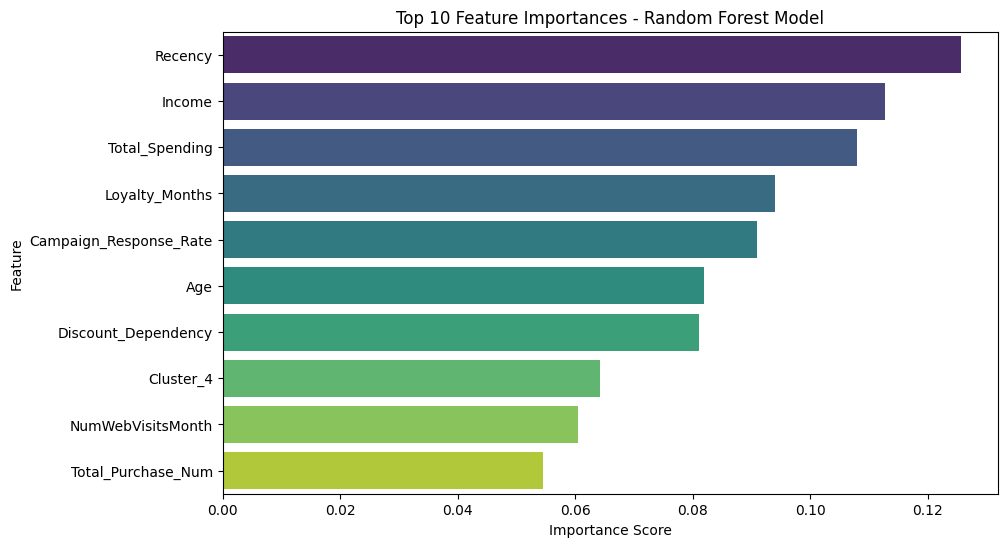

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf[:10], y=feature_importances_rf.index[:10], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances - Random Forest Model")
plt.show()


# High-Value Spender vs. Budget Spender

**Top Features Influencing Predictions:**

* The most important features in the Random Forest model include Recency, Income, Total Spending, Loyalty Months, and Campaign Response Rate.
* Total Spending and Income being in the top three suggests that high-value spenders are primarily defined by how much they spend and their income level.
* Loyalty Months being important indicates that long-term customers might have different spending behaviors compared to new customers.
* The Cluster_4 variable appears in the top 10, which means the segmentation (K-Means clusters) contributes meaningfully to differentiating between high-value and budget spenders.

**Conclusion:**

* High-value spenders tend to have higher total spending, higher income, and longer loyalty months.
* Budget spenders likely fall into clusters with lower spending and income levels.
Clusters play a role in segmenting different spending behaviors.

# Campaigns vs. Discounts

* Campaign Response Rate ranks in the top 5 as a key predictor in the model.
*Discount Dependency is also in the top 10, suggesting that how much a customer relies on discounts is an important differentiator.
* Campaign Response Rate being higher than Discount Dependency in importance indicates that customers' responses to direct campaigns (like emails or ads) influence their spending behavior more than discounts do.

**Conclusion:**

* Campaigns are more influential than discounts in predicting customer responses.
* Customers who engage with campaigns tend to be distinct from those who rely on discounts.
* Discount seekers (high Discount Dependency) might have different spending habits than those who respond to campaigns.




# Model Performance Interpretation

**Overall Accuracy:**

* Logistic Regression: 88.89%
* Random Forest: 87.30%
* Both models perform well, but Logistic Regression slightly outperforms Random Forest.

# Class Imbalance & Recall Issues:

* Class 0 (Not Responded) has high precision and recall → This means the model correctly identifies most customers who will not respond to campaigns.
* Class 1 (Responded) has lower recall (45% in Logistic, 44% in RF) → Many actual responders are misclassified as non-responders.
* F1 Score (55% in Logistic, 51% in RF) shows that the model still struggles to correctly predict responders.

# Confusion Matrix Interpretation:

* The models accurately predict non-responders (Class 0) but miss some actual responders (Class 1).
* The Logistic Regression model predicted 30 out of 66 responders correctly, while the Random Forest model got 29 correct.
* The Logistic Regression model has slightly better recall and precision than Random Forest for responders.


# Retrospective: The Below is the Entire Code

Logistic Regression Optimized Accuracy: 0.8888888888888888
Random Forest Optimized Accuracy: 0.873015873015873
Logistic Regression Precision: 0.6976744186046512
Random Forest Precision: 0.6041666666666666
Logistic Regression Recall: 0.45454545454545453
Random Forest Recall: 0.4393939393939394
Logistic Regression F1 Score: 0.5504587155963303
Random Forest F1 Score: 0.5087719298245614
Logistic Regression ROC AUC: 0.7099393939393941
Random Forest ROC AUC: 0.6943636363636364

Logistic Regression Confusion Matrix:
 [[362  13]
 [ 36  30]]

Random Forest Confusion Matrix:
 [[356  19]
 [ 37  29]]

Logistic Regression Optimized Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       375
           1       0.70      0.45      0.55        66

    accuracy                           0.89       441
   macro avg       0.80      0.71      0.74       441
weighted avg       0.88      0.89      0.88       441


Random Forest Optimized Report:
    

<ipython-input-24-ee446db638b4>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_rf[:10], y=feature_importances_rf.index[:10], palette="viridis")


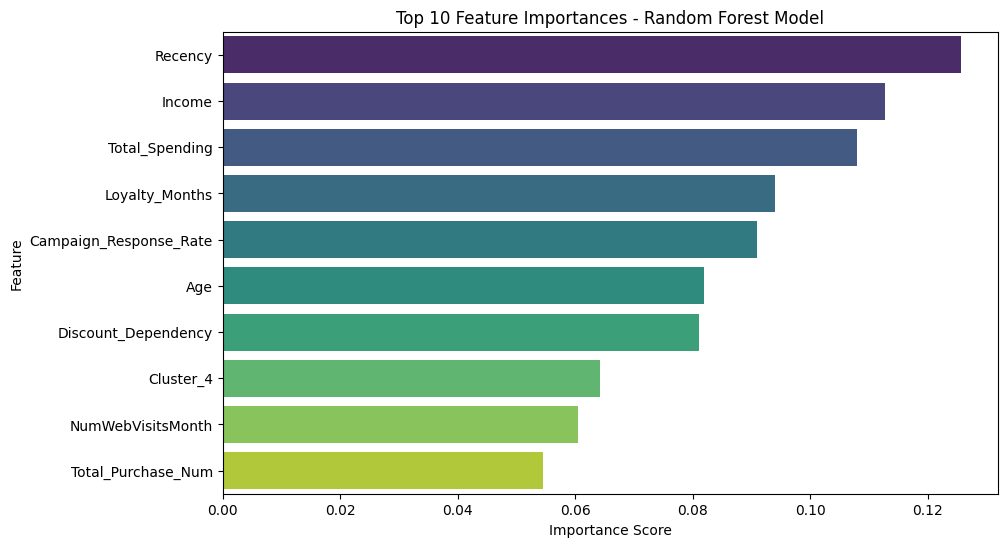

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the preprocessed dataset
preprocessed_data_path = "https://docs.google.com/spreadsheets/d/1sjhviYQkbyW4fDvwqAOrKMuIXJrFuNqIiNwACPoMXNY/export?format=csv"
df = pd.read_csv(preprocessed_data_path)

# Define Features (X) and Target (y)
X = df.drop(columns=["Response"])  # Features excluding target variable
y = df["Response"]  # Target variable

# One-Hot Encode the 'Cluster' column
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_clusters = encoder.fit_transform(X[["Cluster"]])
encoded_clusters_df = pd.DataFrame(encoded_clusters, columns=encoder.get_feature_names_out(["Cluster"]))

# Merge encoded clusters into dataset & drop original cluster column
X = pd.concat([X.drop(columns=["Cluster"]), encoded_clusters_df], axis=1)

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, C=0.1, random_state=42)
log_reg_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features="sqrt", random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_logreg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Models
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Hyperparameter Tuning for Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Hyperparameter Tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'max_features': ['sqrt', 'log2']}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Train Optimized Models
best_log_reg.fit(X_train, y_train)
y_pred_best_logreg = best_log_reg.predict(X_test)

best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate Optimized Models
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
precision_best_logreg = precision_score(y_test, y_pred_best_logreg)
recall_best_logreg = recall_score(y_test, y_pred_best_logreg)
f1_best_logreg = f1_score(y_test, y_pred_best_logreg)
roc_auc_best_logreg = roc_auc_score(y_test, y_pred_best_logreg)
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
classification_report_best_logreg = classification_report(y_test, y_pred_best_logreg)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
classification_report_best_rf = classification_report(y_test, y_pred_best_rf)

# Print Final Results
print("Logistic Regression Optimized Accuracy:", accuracy_best_logreg)
print("Random Forest Optimized Accuracy:", accuracy_best_rf)
print("Logistic Regression Precision:", precision_best_logreg)
print("Random Forest Precision:", precision_best_rf)
print("Logistic Regression Recall:", recall_best_logreg)
print("Random Forest Recall:", recall_best_rf)
print("Logistic Regression F1 Score:", f1_best_logreg)
print("Random Forest F1 Score:", f1_best_rf)
print("Logistic Regression ROC AUC:", roc_auc_best_logreg)
print("Random Forest ROC AUC:", roc_auc_best_rf)
print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_best_logreg)
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_best_rf)
print("\nLogistic Regression Optimized Report:\n", classification_report_best_logreg)
print("\nRandom Forest Optimized Report:\n", classification_report_best_rf)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf[:10], y=feature_importances_rf.index[:10], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances - Random Forest Model")
plt.show()
